In [103]:
import numpy as np
import re
import glob
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import os

[[5 0]
 [0 3]]
accuracy_score: 1.0
recall_score: 1.0
Precision_score: [1. 1.]
f1_score: 1.0
train  0.96875
test  1.0
[0 0 1 1 1 1 0 1 1 0]


/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.

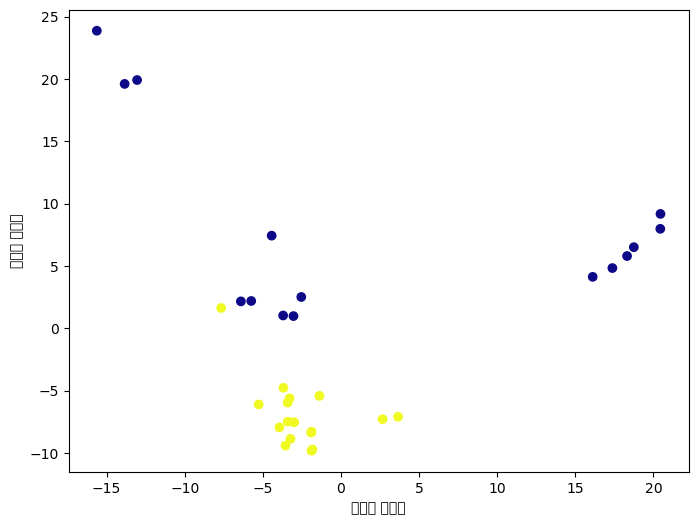

In [152]:


path = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_60'

data_list = []


data_path = glob.glob(path + '/*.txt')

# data path sorting !!!

data_path = sorted(data_path, key = lambda i : int(os.path.splitext(os.path.basename(i))[0]) )


# print(data_path)

for file in range(len(data_path)):
    with codecs.open(data_path[file], 'r', encoding = 'utf-8',
                    errors = 'ignore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\r\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                    str(open_text.strip()))
        data_list.append(open_text)
        

# print(data_path)
       
        
#  데이터 전처리 



import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
t = Okt()
kkma = Kkma()
#형태소 나누기

data_token = [t.morphs(row) for row in data_list]
# data_token = [kkma.pos(row)for row in data_list]


# print(data_token[0])

# token을 한 문장으로 만들기

data_sentence = []

for content in data_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    data_sentence.append(sentence)


    
# print(data_sentence[29], "\n", data_sentence[59])    
    
# 벡터화
######################
vectorizer = TfidfVectorizer(min_df = 3, ngram_range =(1,2))

######################


data_set = vectorizer.fit_transform(data_sentence)

# svm


from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from scipy import sparse

from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
    
    
target = [0]* 20 + [1]* 20



# test split

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.2, random_state = 42)

model = SVC(kernel = 'rbf', gamma = 1, C = 0.01)

# 단순 훈련

model.fit(x_train, y_train)




# print(model.score(x_train, y_train), model.score(x_test, y_test))
# 0.5714285714285714

# piple line

data_set = data_set.toarray(order = None, out = None)

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.2, random_state = 42)

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

model.fit(x_train, y_train)


model.score(x_train, y_train)
# .5714285714285714



# 최적의 모델 찾기 

from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.01,0.1,0.5,1,10,100],
#              'gamma': [1,0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
#              'kernel' : ['rbf','poly''linear']}


# grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, refit = True, verbose = 1)


              
# grid.fit(x_train,y_train)
              
# grid.best_params_

# {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

# 데이터 스케일링

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model.fit(x_train, y_train)
model.score(x_train,y_train)
# 0.5714285714285714

# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train2 = pca.fit_transform(x_train) # z1, z2, z3
x_test2 = pca.fit_transform(x_test)

pca = PCA()
PCscore_train = pca.fit_transform(x_train)
PCscore_test = pca.transform(x_test)

eigen_value = pca.explained_variance_
eigen_value.shape

eigen_vector = pca.components_.transpose()





# np.dot(x_train, eigen_vector)

PCscore_train

eigen_value = pca.explained_variance_
choose = []

for i in eigen_value:
    a = i/np.sum(eigen_value)
    choose.append(a)

choose

plt.figure(figsize = (8,6))
plt.scatter(x_train2[:,0],x_train2[:,1], c=y_train, cmap = 'plasma')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')


################ 특성별 최소, 최대 스케일링


min_on_training = x_train2.min(axis =0)

range_on_training = (x_train2 - min_on_training).max(axis = 0)


x_train_scaled = (x_train2 - min_on_training) / range_on_training
x_test_scaled = (x_test2 - min_on_training) / range_on_training




# 주 성분만 이용하여 svm 다시

#######################


param_grid = {'C': [0.01,0.1,0.5,1,10,100],
             'gamma': [1,0.75,0.5,0.25,0.1,0.01,0.001],
             'kernel': ['rbf', 'poly', 'linear']}

###################

# grid = GridSearchCV(SVC(), param_grid=param_grid, refit = True, verbose= 10 , cv = 5)
# grid.fit(x_test_scaled,y_test)

# print(grid.best_params_)

# print("before fitting")


# from sklearn.model_selection import cross_val_score





#################


svm_clf2 = SVC(C = 5, gamma = 1, kernel = 'linear', probability=True, random_state = 42)

svm_clf2.fit(x_train_scaled, y_train)

##############################

y_pred = svm_clf2.predict(x_test_scaled)
print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("recall_score:", recall_score(y_test,y_pred))
print("Precision_score:", precision_score(y_test, y_pred, average=None))
print("f1_score:",  f1_score(y_test,y_pred))

print("train ", svm_clf2.score(x_train_scaled, y_train))
print("test ", svm_clf2.score(x_test_scaled,y_test))

################################################

# params_c = [0.3,0.5,0.6,0.7,0.8,0.9]
# params_g = [4.5,5,5.5,6,7]

# for i in params_c:
#     for j in params_g:
#         c = i
#         g = j
        
#         svm = SVC(C = c, gamma = g, kernel = 'rbf')
#         svm.fit(x_train_scaled, y_train)
#         print("c: ", i)
#         print("g: ", j)
#         print("score: ",svm.score(x_test_scaled, y_test))
        

##############################################

#predict

path_3 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_2'

test_path = glob.glob(path_3+'/*.txt')
test_list = []

for file in range(len(test_path)):
    with codecs.open(test_path[file], 'r', encoding ='utf-8',
                    errors = 'ignore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        test_list.append(open_text)

        
test_sentence= []
    
test_token = [t.morphs(row) for row in test_list]

for content in test_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    test_sentence.append(sentence)

    
    


# 0 1 0 1 0 1
    
test_set = vectorizer.fit_transform(test_sentence)

test_set = test_set.toarray(order = None, out = None)


test_set = pipeline.fit_transform(test_set)


test_set = scaler.fit_transform(test_set)




pca = PCA(n_components = 3)

test_set = pca.fit_transform(test_set)

test_scaled = (test_set - min_on_training) / range_on_training



print(svm_clf2.predict(test_scaled))

# 정답:  0 0 1 0 0 1 0 1 1 1
# 예측:  0 0 1 1 1 1 0 1 1 0 







In [102]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2023-04-13 21:02:09.715376: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10539022251073414884]